In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [2]:
#loading the csv data
diabetes_df=pd.read_csv("diabetes.csv")

In [3]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes_df[diabetes_df.isnull().any(axis=1)].count()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
#Storing the feature variables and target variables in an array
X=diabetes_df.drop("Outcome",axis=1).values
y=diabetes_df['Outcome'].values

In [7]:
#Splitting the data for train and test set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [8]:
#Importing KNearestClassifier and determining the best value for n_neighbors
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,12)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for n,k in enumerate(neighbors):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    
    
    knn.fit(X_train, y_train)
    
    
    train_accuracy[n] = knn.score(X_train, y_train)
    
    
    test_accuracy[n] = knn.score(X_test, y_test)

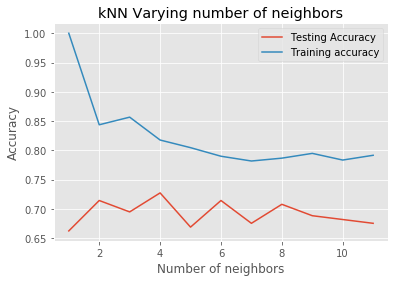

In [10]:
plt.title('kNN Varying number of neighbors')

plt.plot(neighbors, test_accuracy, label='Testing Accuracy')

plt.plot(neighbors, train_accuracy, label='Training accuracy')

plt.legend()

plt.xlabel('Number of neighbors')

plt.ylabel('Accuracy')

plt.show()
    
   

In [11]:
#Training the model and predicting the accuracy score
knn=KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train,y_train)

knn.score(X_test,y_test)

0.7272727272727273

In [12]:
#Determing Classification report

from sklearn.metrics import classification_report

y_pred=knn.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       100
           1       0.69      0.41      0.51        54

    accuracy                           0.73       154
   macro avg       0.71      0.65      0.66       154
weighted avg       0.72      0.73      0.71       154



In [13]:
#Determining Confusion matrix

from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,y_pred))

[[90 10]
 [32 22]]


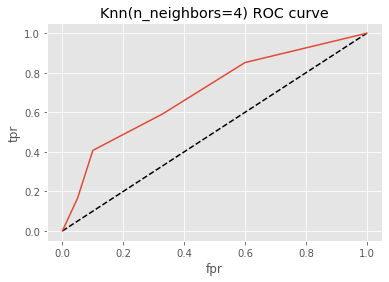

In [14]:
#Plotting the true positive rates with respective false postive rates for the different possible cutpoints of a diagnostic test.

from sklearn.metrics import roc_curve

y_pred_proba=knn.predict_proba(X_test)[:,1]

fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)


plt.plot([0,1],[0,1],'k--')

plt.plot(fpr,tpr, label='Knn')

plt.xlabel('fpr')

plt.ylabel('tpr')

plt.title('Knn(n_neighbors=4) ROC curve')

plt.show()

In [15]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_pred_proba)

0.6988888888888889

In [16]:
#passing a new obervation to predict whether the person has diabetes or not
new_data=[4,143,65,31,0,36.7,0.321,45]

knn.predict([new_data])

print(new_data)


[4, 143, 65, 31, 0, 36.7, 0.321, 45]


In [17]:
print(knn.predict([new_data]))

[1]


In [18]:
#passing another observation 
new_data2=[7,149,74,36,0,33.9,0.630,52]
print(knn.predict([new_data2]))

[0]


In [19]:
#Another method-Hyper Parameter tuning is the process to choose the best parameter value for your model , 
#Now we are going to use GridSearchCV method to find the best n_neighbors

from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
param_grid={'n_neighbors':np.arange(1,50)}
knn_cv=GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [20]:
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 14}
0.7578125
